# Semana 1: Exploración del problema y del dataset

## 1. Cargar y visualizar señales ECG

### Recomendación: usar matplotlib, wfdb, scipy.io

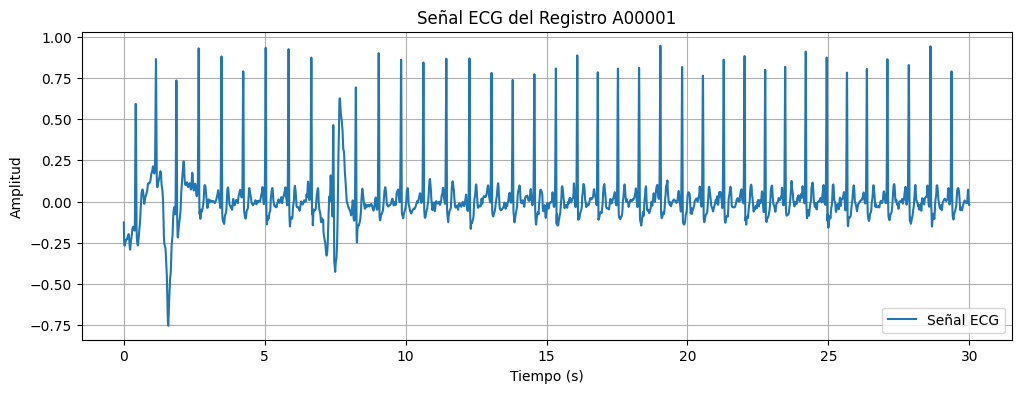

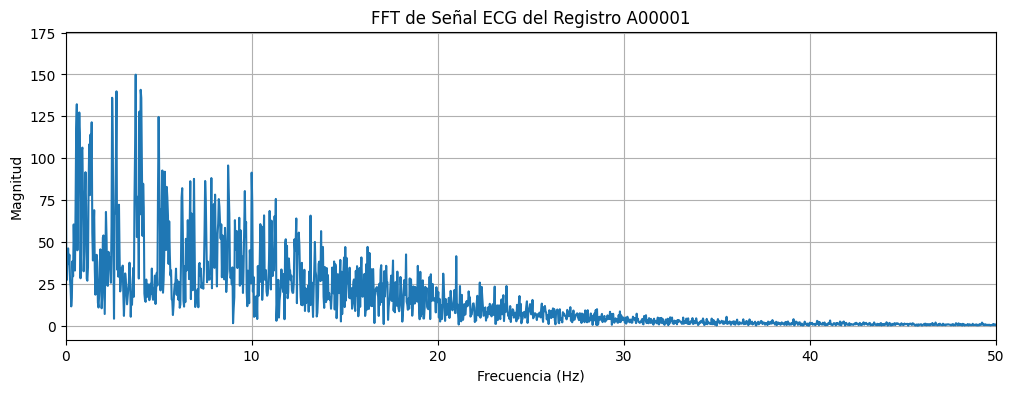

Resumen de la señal ECG:
              time       signal
count  9000.000000  9000.000000
mean     14.998333     0.018569
std       8.660735     0.168327
min       0.000000    -0.754000
25%       7.499167    -0.044000
50%      14.998333    -0.003000
75%      22.497500     0.042000
max      29.996667     0.946000

Resumen de la frecuencia:
       Frequency (Hz)    Magnitude
count     4500.000000  4500.000000
mean        74.983333     5.464634
std         43.306081    15.211000
min          0.000000     0.001888
25%         37.491667     0.082847
50%         74.983333     0.167350
75%        112.475000     1.439376
max        149.966667   167.125000


In [10]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import wfdb
import pandas as pd

# Load the ECG data
record = wfdb.rdrecord('data/training2017/A00001')

# Extract the signal and time
signal = record.p_signal[:, 0]
time = np.arange(len(signal)) / record.fs

# Create a DataFrame for the signal
df = pd.DataFrame({'time': time, 'signal': signal})

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(df['time'], df['signal'], label='Señal ECG')
plt.title('Señal ECG del Registro A00001')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Perform FFT on the ECG signal
fft_signal = np.fft.fft(signal)

# Calculate the frequency bins
frequencies = np.fft.fftfreq(len(signal), d=1/record.fs)

# Plot the FFT result
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(fft_signal)//2])
plt.title('FFT de Señal ECG del Registro A00001')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 50)  # Limit x-axis to 50 Hz for better visibility
plt.grid()
plt.show()

# Show the summary for the amplitude data
print("Resumen de la señal ECG:")
print(df.describe())


# Show the frequency domain data
print("\nResumen de la frecuencia:")
print(pd.DataFrame({'Frequency (Hz)': frequencies[:len(frequencies)//2], 
                    'Magnitude': np.abs(fft_signal)[:len(fft_signal)//2]}).describe())



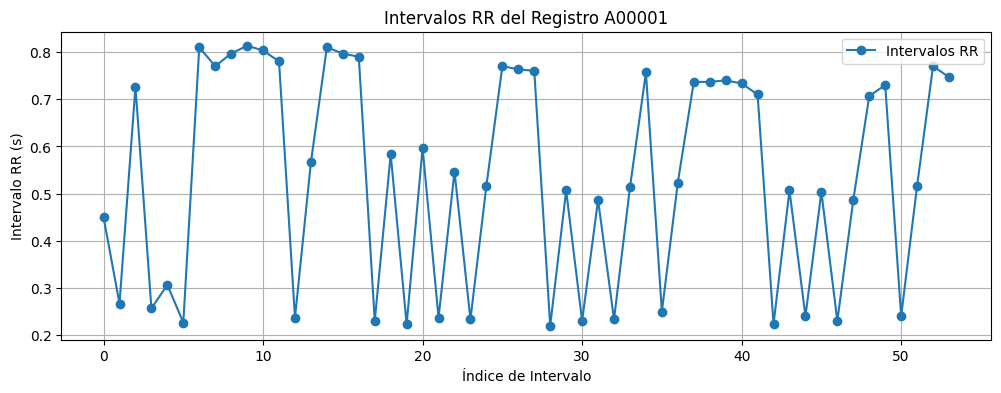

Resumen de los intervalos RR:
       RR Interval (s)
count        54.000000
mean          0.535988
std           0.226965
min           0.220000
25%           0.251667
50%           0.535000
75%           0.754167
max           0.813333


In [11]:
# Visualización de intervalos RR en el registro A00001

# Detect R-peaks from the ECG signal
# Typical ECG R-peaks are the highest positive peaks, so a height threshold is used
peaks, _ = find_peaks(signal, height=np.mean(signal) + 0.5 * np.std(signal), distance=int(0.2 * record.fs))

# Calculate RR intervals in seconds
rr_intervals = np.diff(peaks) / record.fs

# Create a DataFrame for RR intervals
rr_df = pd.DataFrame({'RR Interval (s)': rr_intervals})

# Plot the RR intervals
plt.figure(figsize=(12, 4))
plt.plot(rr_df.index, rr_df['RR Interval (s)'], marker='o', linestyle='-', label='Intervalos RR')
plt.title('Intervalos RR del Registro A00001')
plt.xlabel('Índice de Intervalo')
plt.ylabel('Intervalo RR (s)')
plt.legend()
plt.grid()
plt.show()

# Show the summary for RR intervals
print("Resumen de los intervalos RR:")
print(rr_df.describe())

Ahora se visualiza un registro diferente que representa un caso con arritmia.


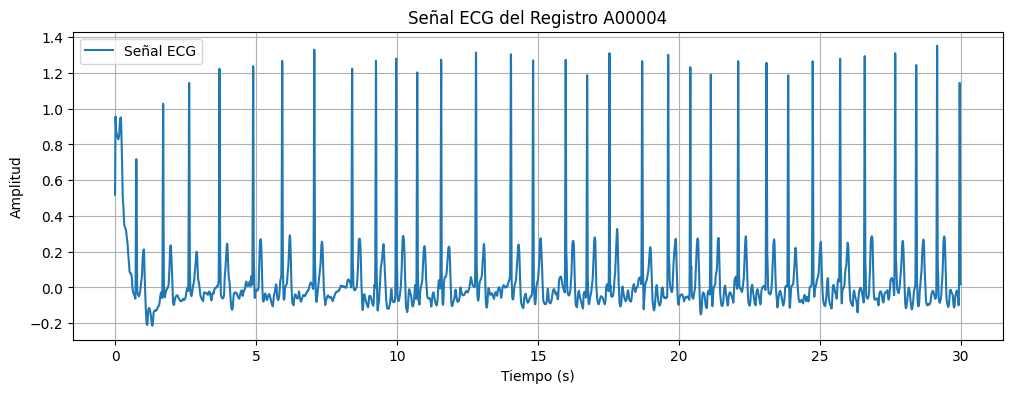

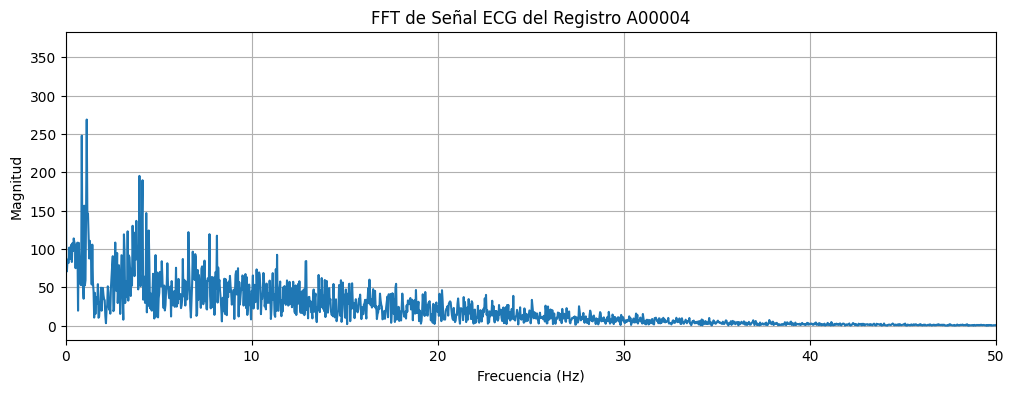

Resumen de la señal ECG:
              time       signal
count  9000.000000  9000.000000
mean     14.998333     0.040544
std       8.660735     0.213631
min       0.000000    -0.214000
25%       7.499167    -0.061000
50%      14.998333    -0.023000
75%      22.497500     0.045000
max      29.996667     1.352000

Resumen de la frecuencia:
       Frequency (Hz)    Magnitude
count     4500.000000  4500.000000
mean        74.983333     7.380757
std         43.306081    19.644312
min          0.000000     0.011447
25%         37.491667     0.240156
50%         74.983333     0.388172
75%        112.475000     2.492193
max        149.966667   364.900000


In [12]:
print("Ahora se visualiza un registro diferente que representa un caso con arritmia.")

# Load the ECG data
record = wfdb.rdrecord('data/training2017/A00004')

# Extract the signal and time
signal = record.p_signal[:, 0]
time = np.arange(len(signal)) / record.fs

# Create a DataFrame for the signal
df = pd.DataFrame({'time': time, 'signal': signal})

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(df['time'], df['signal'], label='Señal ECG')
plt.title('Señal ECG del Registro A00004')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Perform FFT on the ECG signal
fft_signal = np.fft.fft(signal)

# Calculate the frequency bins
frequencies = np.fft.fftfreq(len(signal), d=1/record.fs)

# Plot the FFT result
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(fft_signal)//2])
plt.title('FFT de Señal ECG del Registro A00004')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 50)  # Limit x-axis to 50 Hz for better visibility
plt.grid()
plt.show()


# Show the summary for the amplitude data
print("Resumen de la señal ECG:")
print(df.describe())


# Show the frequency domain data
print("\nResumen de la frecuencia:")
print(pd.DataFrame({'Frequency (Hz)': frequencies[:len(frequencies)//2], 
                    'Magnitude': np.abs(fft_signal)[:len(fft_signal)//2]}).describe())



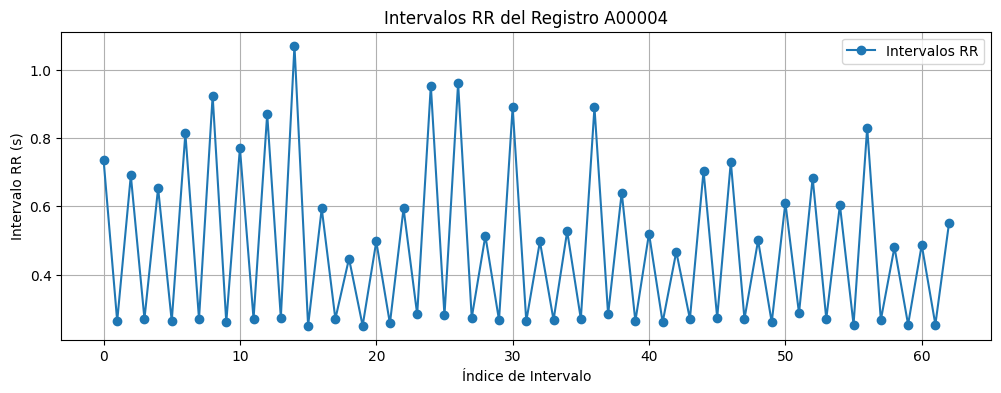

Resumen de los intervalos RR:
       RR Interval (s)
count        63.000000
mean          0.475450
std           0.241234
min           0.250000
25%           0.268333
50%           0.446667
75%           0.646667
max           1.070000


In [13]:
# Visualización de intervalos RR en el registro A00004

# Detect R-peaks from the ECG signal
peaks, _ = find_peaks(signal, height=np.mean(signal) + 0.5 * np.std(signal), distance=int(0.2 * record.fs))

# Calculate RR intervals in seconds
rr_intervals = np.diff(peaks) / record.fs

# Create a DataFrame for RR intervals
rr_df = pd.DataFrame({'RR Interval (s)': rr_intervals})

# Plot the RR intervals
plt.figure(figsize=(12, 4))
plt.plot(rr_df.index, rr_df['RR Interval (s)'], marker='o', linestyle='-', label='Intervalos RR')
plt.title('Intervalos RR del Registro A00004')
plt.xlabel('Índice de Intervalo')
plt.ylabel('Intervalo RR (s)')
plt.legend()
plt.grid()
plt.show()

# Show the summary for RR intervals
print("Resumen de los intervalos RR:")
print(rr_df.describe())


## 2. Resumen del artículo base (Clifford et al., 2017)

### Objetivo del desafío

- Mejorar la detección automática de FA (fibrilación auricular) clasificando registros ECG en cuatro categorías: ritmo sinusal normal, FA, otros ritmos y señales demasiado ruidosas.

### Importancia de la FA

- Es la arritmia cardíaca más común, con alta prevalencia en población adulta mayor y riesgos asociados como ataque cerebrovascular y mortalidad.

### Métodos de detección

- Análisis de actividad auricular: Busca la ausencia de ondas P o la presencia de ondas fibrilatorias en el intervalo TQ.
- Análisis de respuesta ventricular: Evalúa la irregularidad en los intervalos RR, ya que la detección de los picos R en el ECG es menos sensible al ruido.
- Enfoques multivariados y aprendizaje automático: Combina datos de ambos tipos de análisis para mejorar el rendimiento de clasificación.

### Datos y evaluación

- Se utilizaron registros ECG obtenidos con el dispositivo AliveCor, con una frecuencia de muestreo de 300 Hz.
- El conjunto de entrenamiento contenía 8,528 grabaciones y el de prueba, 3,658.
- La evaluación se realizó con una métrica basada en el F1-score.


## 3. Análisis del dataset (cantidad de señales, duración, etiquetas, etc.)

In [14]:
# Read the file to count all records.
with open('data/training2017/RECORDS', 'r') as f:
    records = f.read().splitlines()

# Count the number of records
num_records = len(records)
print(f"Número total de registros (cantidad de señales): {num_records}\n")


# Read the reference annotations
reference_df = pd.read_csv('data/training2017/REFERENCE.csv', header=None, names=['record', 'annotation'])

# Count the number of annotations
num_annotations = reference_df.shape[0]
print(f"Número total de etiquetas: {num_annotations}")

# Count the amount of each annotation
annotation_counts = reference_df['annotation'].value_counts()
print("Conteo de cada etiqueta:")
print(annotation_counts)



Número total de registros (cantidad de señales): 8528

Número total de etiquetas: 8528
Conteo de cada etiqueta:
annotation
N    5050
O    2456
A     738
~     284
Name: count, dtype: int64


In [15]:
# Duration of each record
durations = []
for record_name in records:
    record = wfdb.rdrecord(f'data/training2017/{record_name}')
    duration = len(record.p_signal) / record.fs
    durations.append((record_name, duration))

# Create a DataFrame for the durations
durations_df = pd.DataFrame(durations, columns=['record', 'duration'])

# Print the summary statistics
print("\nResumen de la duración (en segundos) de los registros:")
print(durations_df.describe())




Resumen de la duración (en segundos) de los registros:
          duration
count  8528.000000
mean     32.497468
std      10.889442
min       9.046667
25%      30.000000
50%      30.000000
75%      30.000000
max      60.953333


In [16]:
# Verificando que la cantidad de registros y señales coincida usando el segundo dato de cada registro

# Count the number of signals in each record
signal_counts = []
for record_name in records:
    record = wfdb.rdrecord(f'data/training2017/{record_name}')
    num_signals = record.n_sig
    signal_counts.append((record_name, num_signals))

# Create a DataFrame for the signal counts
signal_counts_df = pd.DataFrame(signal_counts, columns=['record', 'num_signals'])
print("\nResumen de la cantidad de señales por registro:")
print(signal_counts_df.describe())

print("\nLa cantidad de registros y señales coincide, ya que cada registro tiene 1 señal.\n")



Resumen de la cantidad de señales por registro:
       num_signals
count       8528.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0

La cantidad de registros y señales coincide, ya que cada registro tiene 1 señal.



In [17]:
# Check the number of samples in each record
sample_counts = []
for record_name in records:
    record = wfdb.rdrecord(f'data/training2017/{record_name}')
    num_samples = len(record.p_signal)
    sample_counts.append((record_name, num_samples))

# Create a DataFrame for the sample counts
sample_counts_df = pd.DataFrame(sample_counts, columns=['record', 'num_samples'])
print("\nResumen de la cantidad de muestras por registro:")
print(sample_counts_df.describe())




Resumen de la cantidad de muestras por registro:
        num_samples
count   8528.000000
mean    9749.240267
std     3266.832537
min     2714.000000
25%     9000.000000
50%     9000.000000
75%     9000.000000
max    18286.000000
